In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import PolynomialFeatures


In [3]:
df = pd.read_csv("kelp.csv", index_col = 1)
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
100,-1,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
200,-1,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0
300,-1,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0
400,-1,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199500,-1,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0
199600,-1,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0
199700,-1,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0


<Axes: xlabel='timestamp'>

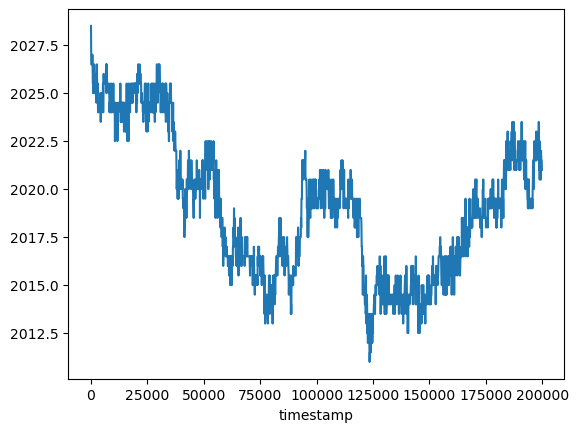

In [4]:
df.mid_price.plot()

-1.7785201407021153e-06

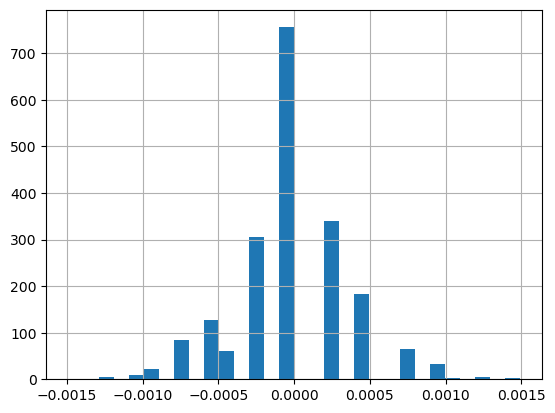

In [5]:
df_return = df['mid_price'].pct_change()
df_return.hist(bins = 30)
df_return.mean()

In [6]:
imbalance = []
for i in range(len(df)):
    imbal = 0
    for j in range(1,4):
        col_bid = 'bid_price_' + str(j)
        vol_bid = 'bid_volume_' + str(j)
        col_ask = 'ask_price_' + str(j)
        vol_ask = 'ask_volume_' + str(j)

        if np.isnan(df[col_bid].iloc[i]):
            pass
        else:
            imbal += (df[col_bid].iloc[i] - df['mid_price'].iloc[i]) * df[vol_bid].iloc[i]

        if np.isnan(df[col_ask].iloc[i]):
            pass
        else:
            imbal += (df[col_ask].iloc[i] - df['mid_price'].iloc[i]) * df[vol_ask].iloc[i]
        
    imbalance.append(imbal)
imbalance

[-91.5,
 22.0,
 -3.0,
 29.0,
 0.0,
 0.0,
 -42.0,
 -26.0,
 -29.0,
 0.0,
 32.0,
 -8.0,
 50.0,
 0.0,
 -28.0,
 0.0,
 62.0,
 52.0,
 0.0,
 34.0,
 0.0,
 25.0,
 56.0,
 0.0,
 87.5,
 -3.0,
 -27.5,
 0.0,
 0.0,
 0.0,
 -4.5,
 31.0,
 26.0,
 34.0,
 0.0,
 0.0,
 0.0,
 -4.5,
 0.0,
 -3.0,
 0.0,
 0.0,
 0.0,
 43.0,
 0.0,
 1.5,
 0.0,
 42.0,
 0.0,
 0.0,
 0.0,
 -9.0,
 -12.0,
 -42.5,
 48.0,
 0.0,
 -58.0,
 1.5,
 0.0,
 -7.5,
 0.0,
 1.5,
 0.0,
 -7.5,
 0.0,
 0.0,
 0.0,
 -30.5,
 70.0,
 28.0,
 -56.0,
 0.0,
 0.0,
 -6.0,
 1.5,
 0.0,
 0.0,
 1.5,
 0.0,
 -6.0,
 35.0,
 0.0,
 24.0,
 0.0,
 0.0,
 0.0,
 1.5,
 31.0,
 -35.5,
 -27.5,
 0.0,
 27.0,
 34.0,
 0.0,
 0.0,
 -6.0,
 0.0,
 0.0,
 0.0,
 -52.0,
 -12.0,
 0.0,
 0.0,
 -74.5,
 -30.5,
 -29.0,
 70.0,
 -1.5,
 -4.5,
 -10.5,
 -51.5,
 0.0,
 0.0,
 -4.5,
 0.0,
 34.0,
 0.0,
 70.0,
 62.0,
 35.5,
 0.0,
 28.0,
 -6.0,
 0.0,
 -6.0,
 1.5,
 0.0,
 0.0,
 0.0,
 -10.5,
 -75.5,
 -10.5,
 29.5,
 -33.0,
 0.0,
 42.0,
 29.0,
 -6.0,
 -1.5,
 53.0,
 -33.5,
 26.0,
 1.5,
 0.0,
 0.0,
 0.0,
 58.0,
 0.0,
 0.0,
 -

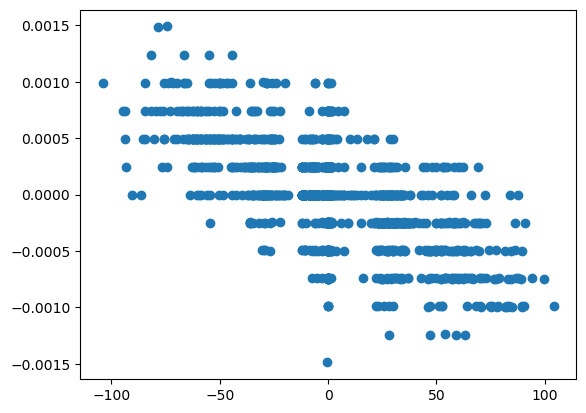

In [7]:
plt.scatter(imbalance, df_return)

In [73]:
df['pct_change'] = df_return
df['imbalance'] = imbalance
log_returns = np.log(df['mid_price']/df['mid_price'].shift(1))
df['log_return'] =log_returns


In [74]:
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,pct_change,imbalance,log_return
timestamp,,,,,,,,,,,,,,,,,,,
0,-1,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0,NaN,-91.5,NaN
100,-1,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0,-0.000986,22.0,-0.000986
200,-1,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0,0.000000,-3.0,0.000000
300,-1,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0,0.000000,29.0,0.000000
400,-1,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199500,-1,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0,0.000742,0.0,0.000742
199600,-1,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0,-0.000247,21.0,-0.000247
199700,-1,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0,0.000000,25.0,0.000000


In [65]:
df['log_return']

timestamp
0              NaN
100      -0.000986
200       0.000000
300       0.000000
400       0.000000
            ...   
199500    0.000742
199600   -0.000247
199700    0.000000
199800    0.000000
199900   -0.000247
Name: log_return, Length: 2000, dtype: float64

In [66]:
df['pct_change']

timestamp
0              NaN
100      -0.000986
200       0.000000
300       0.000000
400       0.000000
            ...   
199500    0.000742
199600   -0.000247
199700    0.000000
199800    0.000000
199900   -0.000247
Name: pct_change, Length: 2000, dtype: float64

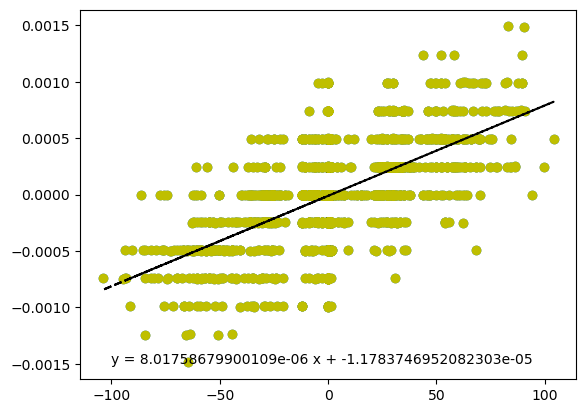

In [75]:
plt.scatter(df['imbalance'], df['log_return'].shift(-1))
x = df['imbalance'].values[:-1]
y = df['log_return'].shift(-1)[:-1].values

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'yo', x, m*x+b, '--k')
plt.text(-100, -0.0015, f'y = {m} x + {b}')
plt.show()


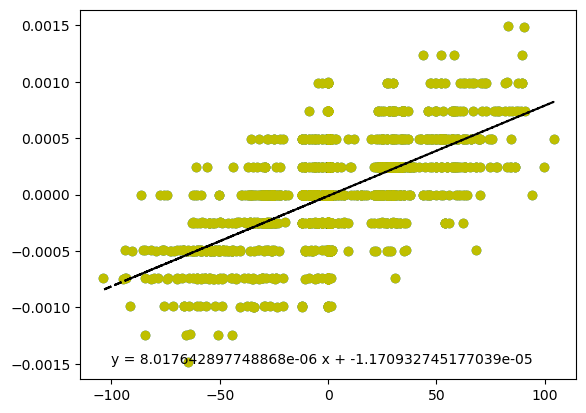

In [76]:
plt.scatter(df['imbalance'], df['pct_change'].shift(-1))
x = df['imbalance'].values[:-1]
y = df['pct_change'].shift(-1)[:-1].values

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'yo', x, m*x+b, '--k')
plt.text(-100, -0.0015, f'y = {m} x + {b}')
plt.show()


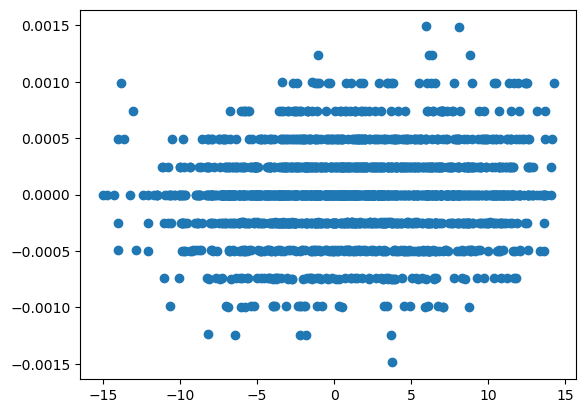

In [86]:
plt.scatter(df['imbalance'].rolling(30).mean(), df['pct_change'].shift(-1))


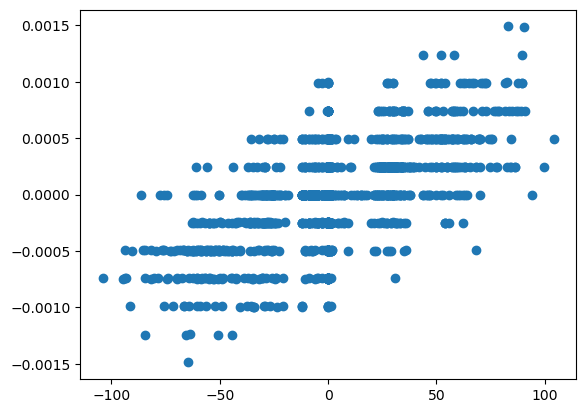

In [96]:
plt.scatter(df['imbalance'], df['pct_change'].shift(-1))

In [98]:
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,pct_change,imbalance,log_return
timestamp,,,,,,,,,,,,,,,,,,,
0,-1,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0,NaN,-91.5,NaN
100,-1,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0,-0.000986,22.0,-0.000986
200,-1,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0,0.000000,-3.0,0.000000
300,-1,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0,0.000000,29.0,0.000000
400,-1,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199500,-1,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0,0.000742,0.0,0.000742
199600,-1,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0,-0.000247,21.0,-0.000247
199700,-1,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0,0.000000,25.0,0.000000
